In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#merged_discount
path="/content/merged_discount.csv"
merged_discount= pd.read_csv(path)

In [3]:
#merged_discount_brands
path="/content/merged_discount_brands.csv"
merged_discount_brands= pd.read_csv(path)
#merged_discount
path="/content/merged_discount.csv"
merged_discount= pd.read_csv(path)

#orders_brands
path="/content/orders_brands.csv"
orders_brands= pd.read_csv(path)
#product_category
path="/content/product_category.csv"
product_category= pd.read_csv(path)

In [4]:
pca=orders_brands.merge(product_category, on='sku', how='left')
pca

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,short,long,name,desc,price,in_stock,type,category
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC,OWC,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,Others
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,IOT,iOttie,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,Others
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,APP,Apple,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,Others
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,PAC,Pack,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,Laptop
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,CRU,Crucial,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60906,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,2018-03-14 11:47:50,18.98,Completed,APP,Apple,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,Headset
60907,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,2018-03-14 11:50:48,24.97,Completed,APP,Apple,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Others
60908,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,2018-03-14 11:51:42,24.97,Completed,APP,Apple,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Others
60909,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,2018-03-14 11:58:40,34.96,Completed,APP,Apple,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,Others


How products should be classified into different categories to simplify reports and analysis.

In [ ]:
pc=product_category.groupby("category",as_index=False).count().nlargest(30,"sku")
pct=pc[pc["category"].str.contains("Others")==False]
pct


,category,sku,name,desc,price,in_stock,type
14,Phone case,1061,1061,1061,1061,1061,1061
20,Server,941,941,940,941,941,941
22,Tablet,820,820,818,820,820,820
7,Hard drive,671,671,671,671,671,671
26,Wireless device,464,464,463,464,464,464
9,Laptop,373,373,373,373,373,373
23,Tablet case,367,367,367,367,367,367
10,Laptop case,269,269,269,269,269,269
1,Apple desktop,247,247,247,247,247,247
24,Touchbar Apple laptop,237,237,237,237,237,237


In [ ]:
different_categories=pca.groupby("category",as_index=False)["product_quantity"].sum().nlargest(10,"product_quantity")

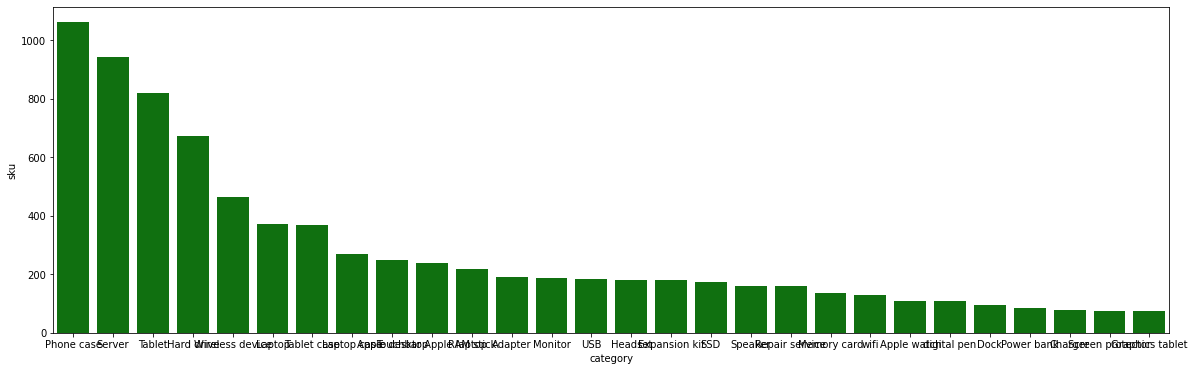

In [ ]:
fig = plt.subplots(figsize=(20,6))
sns.barplot(data=pct, x='category', y='sku', color='green')#products sold during easter


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

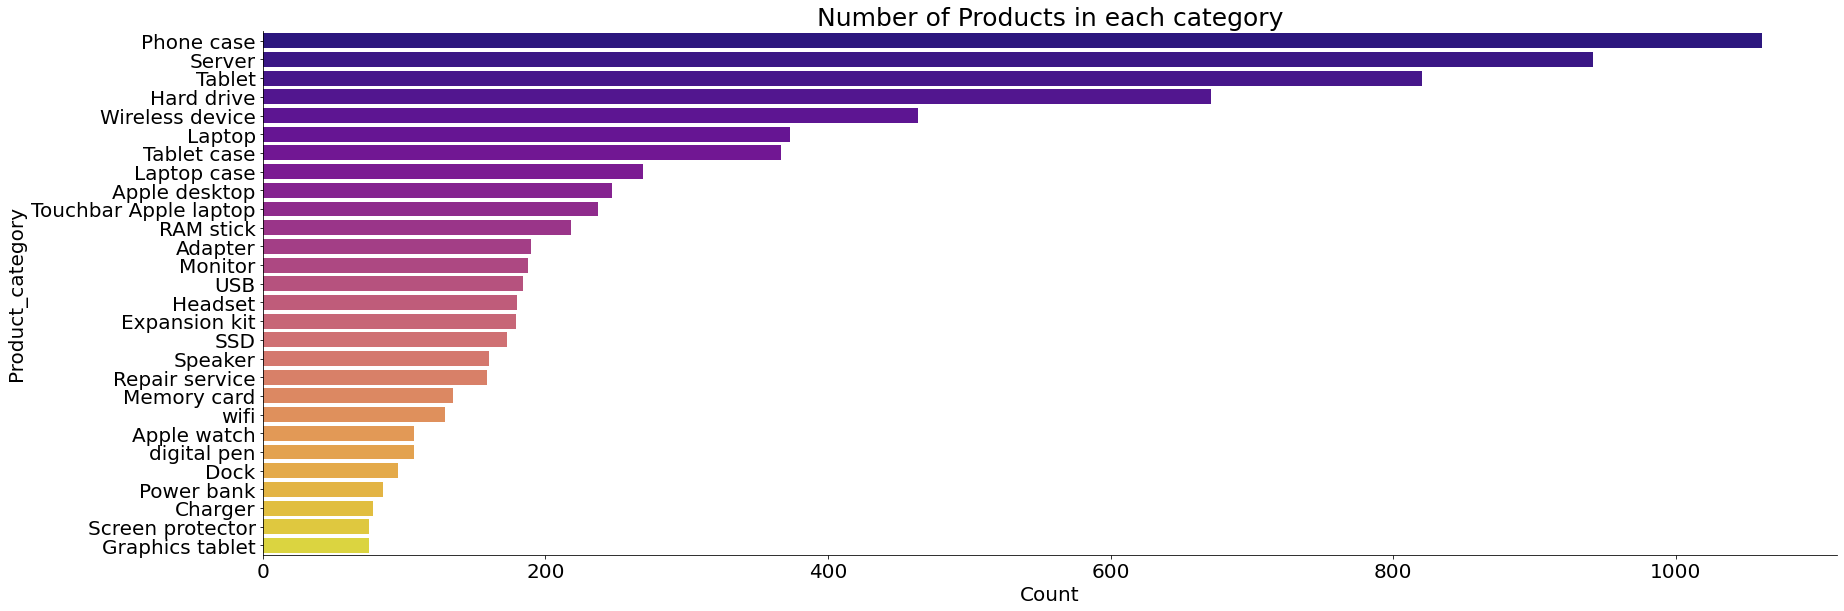

In [ ]:
sns.catplot(kind="bar",
            data=pct,
            x="sku",
            y="category",
            height=8,
            aspect=3,
            palette="plasma");
plt.xlabel("Count",fontsize=20)
plt.ylabel("Product_category",fontsize=20)
plt.title("Number of Products in each category", fontsize=25)
plt.yticks(size = 20)
plt.xticks(size=20)

 What is the distribution of product prices across different categories.
 

In [ ]:
distribution =(product_category.groupby("category", as_index=False)
                         ["price"].agg(["count","mean"])
                         .nlargest(30, "mean")
)        
distribution=distribution.reset_index()

In [ ]:
distribution1= (
                         product_category.groupby("category")
                         ["price"].agg(["count","mean"],as_index=False)
                         .nlargest(30, "mean")
                         )
distribution1.reset_index()
distribution1

,count,mean
category,,
Apple desktop,247,3525.009271
Touchbar Apple laptop,237,2933.846498
Laptop,373,2601.119920
Server,941,1201.960240
Others,2189,811.618730
Graphics tablet,75,661.610533
Hard drive,671,661.164435
Monitor,188,510.536590
SSD,173,406.631266


In [ ]:
pca.groupby("category")["product_quantity"].sum()

category
Adapter                   2421
Apple desktop              710
Apple watch                291
Charger                    948
Dock                       805
Expansion kit              791
Graphics tablet           1456
Hard drive                7615
Headset                   2640
Laptop                     653
Laptop case               1155
Memory card                909
Monitor                   1903
Others                   21460
Phone case                4827
Power bank                 609
RAM stick                 4088
Repair service             109
SSD                       2514
Screen protector           985
Server                    1245
Speaker                    899
Tablet                     663
Tablet case                876
Touchbar Apple laptop      858
USB                       1427
Wireless device           4072
digital pen                811
wifi                       575
Name: product_quantity, dtype: int64

ValueError: ignored

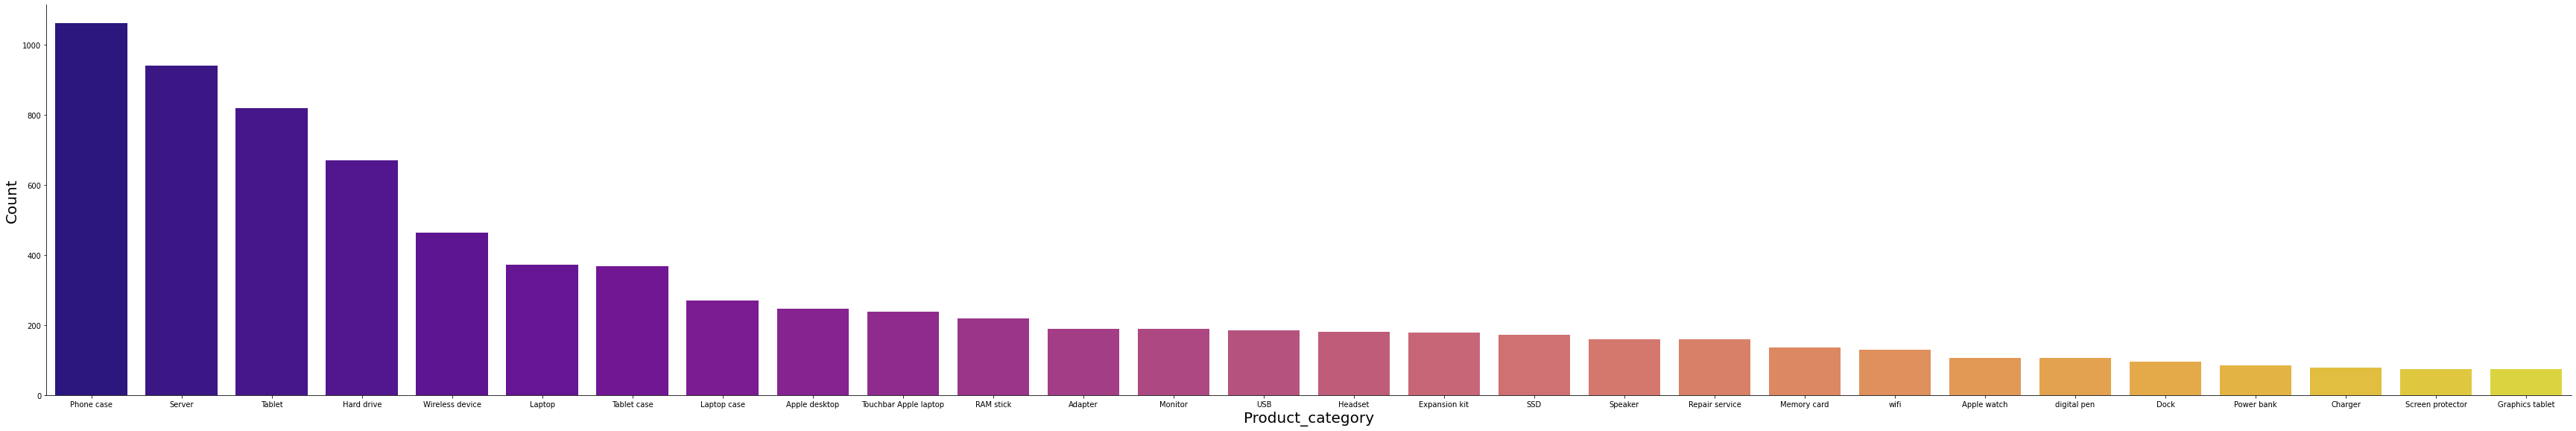

In [ ]:
sns.catplot(kind="bar",
            data=pct,
            x="category",
            y="sku",
            height=8,
            aspect=6,
            palette="plasma",
            ax=ax1)
plt.xlabel("Product_category",fontsize=20)
plt.ylabel("Count",fontsize=20)

 # plots the first set of data, and sets it to ax1. 

 # applies twinx to ax2, which is the second y axis. 
sns.catplot(
            kind="point",
            data=distribution,
            x="category",
            y="price",
            height=8,
            aspect=6,
           marker = 'o'
            )
plt.xlabel("Product_category",fontsize=20)
plt.ylabel("Price",fontsize=20)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

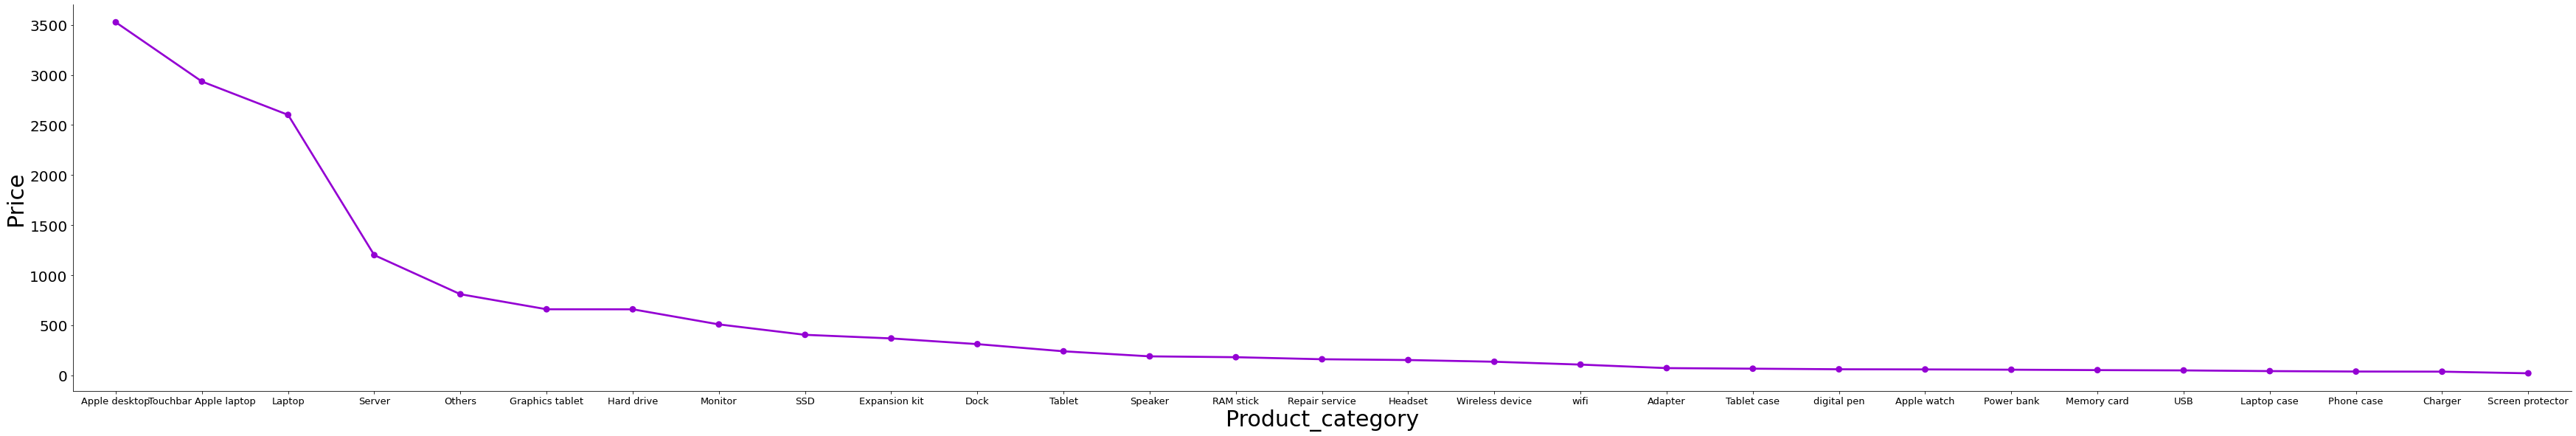

In [ ]:
sns.catplot(
            kind="point",
            data=distribution,
            x="category",
            y="mean",
            height=8,
            aspect=6,
           marker = 'o',
           color="darkviolet"
            )
plt.xlabel("Product_category",fontsize=30)
plt.ylabel("Price",fontsize=30)
plt.yticks(size = 20)
plt.xticks(size=13)


ValueError: ignored

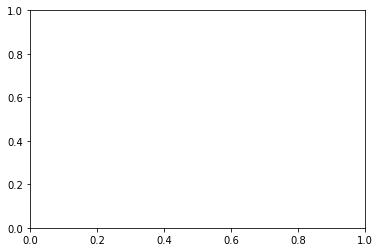

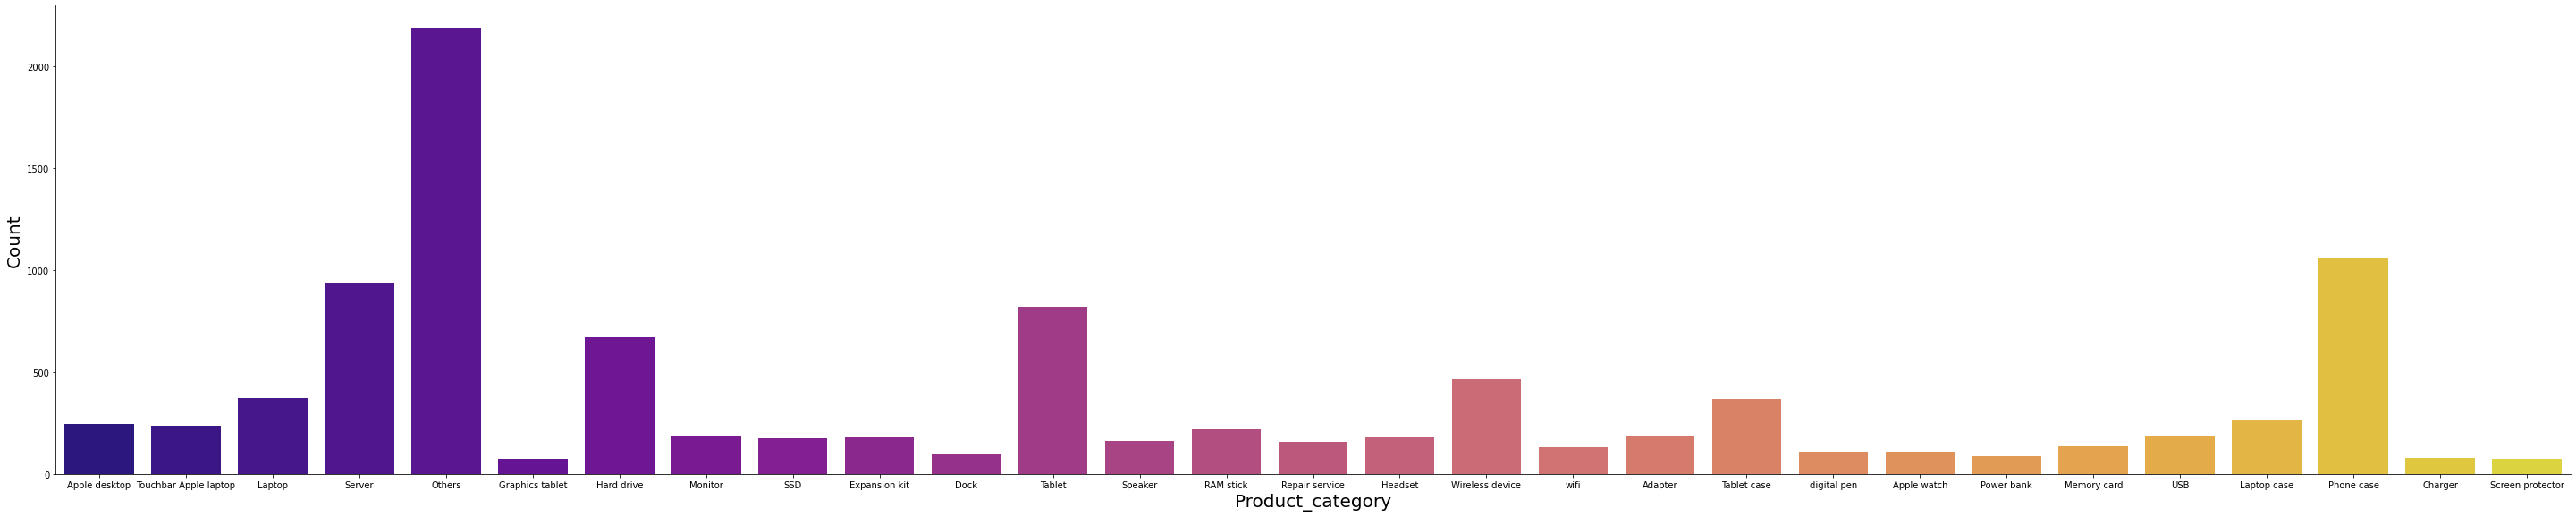

In [ ]:
fig,ax = plt.subplots()
sns.catplot(kind="bar",
            data=distribution,
            x="category",
            y="count",
            height=8,
            aspect=5,
            palette="plasma",
            );
            
plt.xlabel("Product_category",fontsize=20)
plt.ylabel("Count",fontsize=20)

 # plots the first set of data, and sets it to ax1. 

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 
sns.catplot(
            kind="point",
            data=distribution,
            x="category",
            y="price",
            height=8,
            aspect=5,
           marker = 'o', ax = ax2
            )
plt.xlabel("Product_category",fontsize=20)
plt.ylabel("Price",fontsize=20)


In [ ]:
#used matplotlib here

fig,ax = plt.subplots()
ax.bar(distribution.category,distribution.count,color='steelblue')
ax.set_xlabel('Product_category',fontsize=14)
ax.set_ylabel('Count', color='steelblue', fontsize=14)
ax2=ax.twinx()     
ax2.pointplot(distribution.category,distribution.mean,color='orange')  
ax2.set_ylabel('Price', color='orange', fontsize=14)   


In [ ]:
distribution =(product_category.groupby("category", as_index=False)
                         ["price"].agg(["count","mean"])
                         .nlargest(30, "mean")
)        
distribution=distribution.reset_index()
distribution

,category,count,mean
0,Apple desktop,247,3525.009271
1,Touchbar Apple laptop,237,2933.846498
2,Laptop,373,2601.119920
3,Server,941,1201.960240
4,Others,2189,811.618730
5,Graphics tablet,75,661.610533
6,Hard drive,671,661.164435
7,Monitor,188,510.536590
8,SSD,173,406.631266
9,Expansion kit,179,370.753313


In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6)) # initializes figure and plots
sns.barplot(data=merged_discount, x='month', y='unit_price_total', ax = ax1, color='yellow') # plots the first set of data, and sets it to ax1. 

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 
sns.lineplot(data=merged_discount, x='month', y='discount', marker = 'o', ax = ax2) # plots the second set, and s

In [ ]:
dis= (
                         product_category.groupby("category", as_index=False)
                         ["price"].mean()
                         .nlargest(30, "price")
                         )
dis

,category,price
1,Apple desktop,3525.009271
24,Touchbar Apple laptop,2933.846498
9,Laptop,2601.119920
20,Server,1201.960240
13,Others,811.618730
6,Graphics tablet,661.610533
7,Hard drive,661.164435
12,Monitor,510.536590
18,SSD,406.631266
5,Expansion kit,370.753313


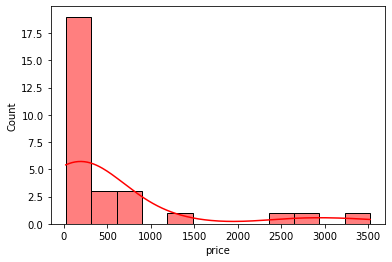

In [ ]:
sns.histplot(data=dis, x="price", kde=True, color='red')

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]), <a list of 10 Text major ticklabel objects>)

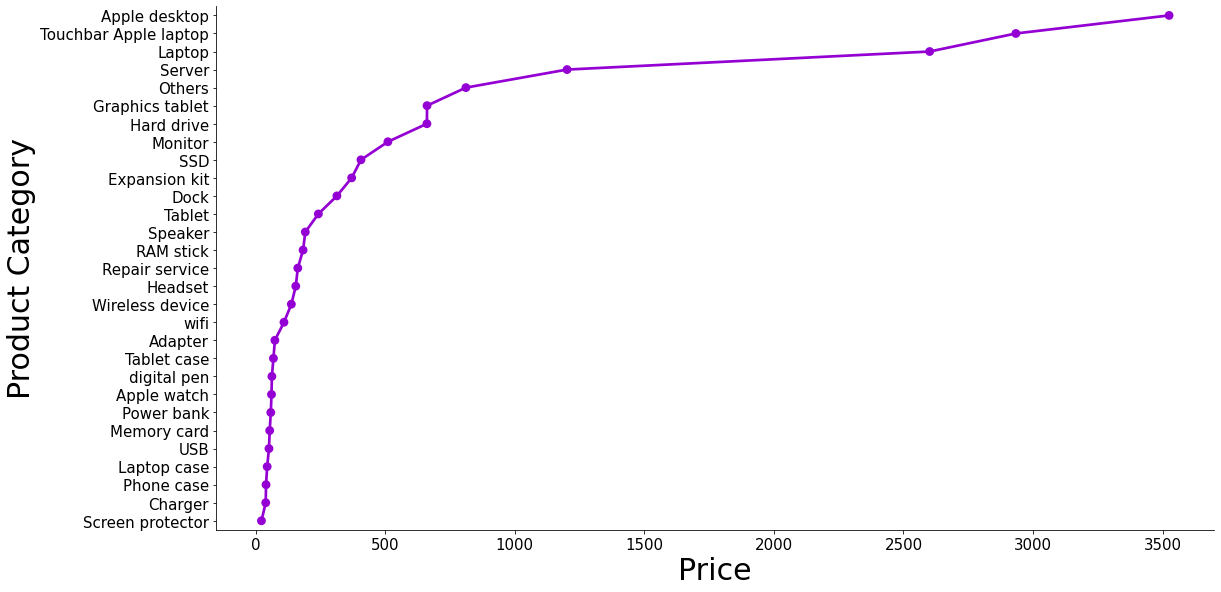

In [ ]:
sns.catplot(
            kind="point",
            data=dis,
            x="price",
            y="category",
            height=8,
            aspect=2,
            color="darkviolet"
            );
plt.xlabel("Price",fontsize=30)
plt.ylabel("Product Category",fontsize=30)
plt.yticks(size = 15)
plt.xticks(size=15)

How many products are being discounted.

In [ ]:
merged_discount['product_quantity'].sum()

68315

In [ ]:
# Calculate the number of products discounted for each row
organized_orders_with_brand.loc[organized_orders_with_brand['discount'] > 0, 'number_of_prod_discounted'] = 1 * organized_orders_with_brand['product_quantity']
organized_orders_with_brand.loc[organized_orders_with_brand['discount'] == 0, 'number_of_prod_discounted'] = 0 * organized_orders_with_brand['product_quantity']
# Count the number of discounted products & its percentage

number_of_discounted = organized_orders_with_brand['number_of_prod_discounted'].sum()
number_of_products = organized_orders_with_brand['product_quantity'].sum()

percentage_of_discounted = (number_of_discounted / number_of_products) * 100
percentage_of_discounted = percentage_of_discounted.round(2)

print("We have:", number_of_discounted, "products discounted")
print("We have:", percentage_of_discounted, "rate of products discounted")

In [ ]:
number_of_products=merged_discount['product_quantity'].sum()
number_of_products

68315

In [45]:
merged_discount['percent']=merged_discount['discount']/merged_discount['price']*100
merged_discount.drop(merged_discount[(merged_discount['percent']>99)].index,inplace=True)
merged_discount

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,desc,price,in_stock,type,discount,unit_price_total,percent,week
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,47.49,22.134776,01
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,18.99,17.254902,01
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,72.19,18.887640,01
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,643.01,2565.99,20.037706,01
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,60.90,20.898818,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60906,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,2018-03-14 11:47:50,18.98,Completed,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,21.01,13.99,60.028571,10
60907,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,2018-03-14 11:50:48,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,19.98,60.040000,10
60908,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,2018-03-14 11:51:42,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,19.98,60.040000,10
60909,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,2018-03-14 11:58:40,34.96,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,29.97,60.040000,10


In [ ]:
merged_discount.loc[merged_discount['discount'] > 0,'number_of_discounted_products']= 1 * merged_discount['product_quantity']
number_of_discounted_products=merged_discount['number_of_discounted_products'].sum()
number_of_discounted_products

62784

In [ ]:
percentage_of_discounted_products = (number_of_discounted_products / number_of_products) * 100
percentage_of_discounted_products


91.90368147551781

In [ ]:
discount = (
                        merged_discount.groupby("sku", as_index=False)
                         ["product_quantity"].agg(["sum", "mean"])
                         .nlargest(10, "sum")
)
discount

,sum,mean
sku,,
APP1190,1012,1.096425
APP0698,843,1.709939
WDT0183,528,1.708738
APP1922,506,1.054167
APP0927,495,1.292428
SAM0074,358,1.101538
CRU0051,334,1.205776
NTE0013,293,1.308036
APP1214,286,1.071161


In [ ]:
sns.catplot(
            kind="point",
            data=distribution,
            x="price",
            y="category",
            height=8,
            aspect=2
            );

ValueError: ignored

How big are the offered discounts as a percentage of the product prices.


Are there seasonal patterns in the evolution of sales?

In [ ]:
# Draw a line plot with average discount rate and bar plots with weekly revenue on the same plot
fig, ax1 = plt.subplots(figsize=(15,6)) # initializes figure and plots
sns.barplot(data=weekly_revenue, x='week', y='unit_price_total', ax = ax1, color='orange') # plots the first set of data, and sets it to ax1. 

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 
sns.lineplot(data=weekly_discount, x='week', y='discount_rate', marker = 'o', ax = ax2) # plots the second set, and s

In [ ]:
Nov=merged_discount.loc[merged_discount["date"].dt.strftime("%Y-%m") == "2017-11"].sort_values('date')





In [28]:
merged_discount['week'] = merged_discount['date'].dt.strftime('%U')
merged_discount

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,desc,price,in_stock,type,discount,unit_price_total,percent,week
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,47.49,22.134776,01
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,18.99,17.254902,01
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,72.19,18.887640,01
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,643.01,2565.99,20.037706,01
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,60.90,20.898818,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60906,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,2018-03-14 11:47:50,18.98,Completed,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,21.01,13.99,60.028571,10
60907,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,2018-03-14 11:50:48,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,19.98,60.040000,10
60908,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,2018-03-14 11:51:42,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,19.98,60.040000,10
60909,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,2018-03-14 11:58:40,34.96,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,29.97,60.040000,10


In [44]:
merged_discount["unit_price_total"]=merged_discount.unit_price*merged_discount.product_quantity
merged_discount

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,desc,price,in_stock,type,discount,unit_price_total,percent,week
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,47.49,22.134776,01
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,18.99,17.254902,01
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,72.19,18.887640,01
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,643.01,2565.99,20.037706,01
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,60.90,20.898818,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60906,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,2018-03-14 11:47:50,18.98,Completed,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,21.01,13.99,60.028571,10
60907,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,2018-03-14 11:50:48,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,19.98,60.040000,10
60908,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,2018-03-14 11:51:42,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,19.98,60.040000,10
60909,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,2018-03-14 11:58:40,34.96,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01,29.97,60.040000,10


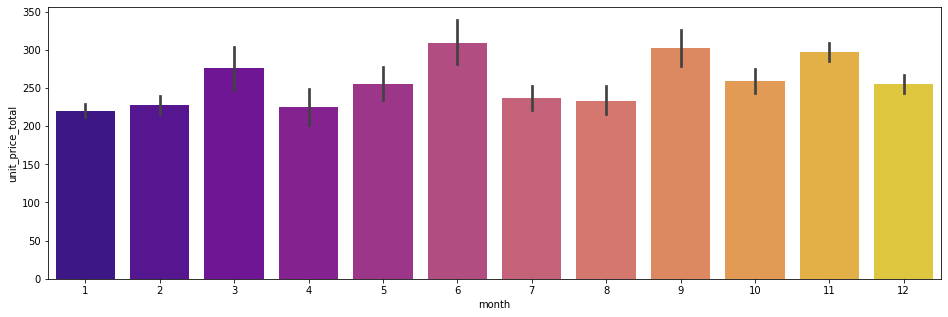

In [ ]:
fig = plt.subplots(figsize=(16,5))
sns.barplot(data=merged_discount, x='month', y='unit_price_total',palette='plasma')#products sold during easter

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

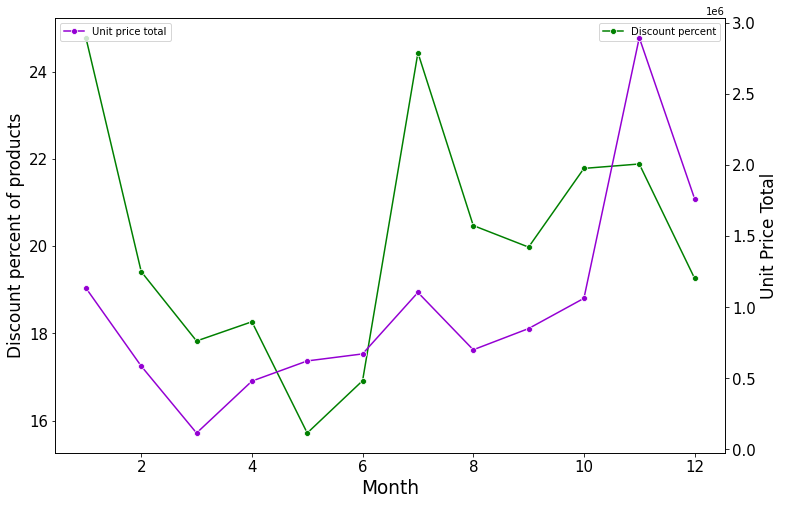

In [46]:
#when discounts are higher, the products sold are higher
fig, ax1 = plt.subplots(figsize=(12,8)) # initializes figure and plots
sns.lineplot(data=xxx, x='month', y='percent', ax = ax1,marker='o', color='Green',ci=None) # plots the first set of data, and sets it to ax1. 
plt.xlabel("Month",fontsize=18.5)
plt.ylabel("Discount percent of products",fontsize=17)
plt.xticks(size=15)
plt.yticks(size = 15)
plt.legend(labels=["Discount percent"])
ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 
sns.lineplot(data=yyy, x='month', y='unit_price_total', marker = 'o', color='darkviolet',ax = ax2,ci=None) # plots the second set, and s
plt.legend(labels=["Unit price total"])
plt.ylabel("Unit Price Total",fontsize=17)
plt.yticks(size = 15)
plt.xticks(size=15)

In [35]:
xxx= md.groupby("month", as_index=False)["percent"].mean()
xxx                     


,month,percent
0,1,24.774912
1,2,19.415758
2,3,17.827782
3,4,18.268132
4,5,15.719298
5,6,16.917826
6,7,24.429859
7,8,20.472568
8,9,19.977819
9,10,21.780894


In [47]:
yyy=md.groupby("month",as_index=False)["unit_price_total"].sum()     
yyy.sum()

month                     78.00
unit_price_total    11989795.48
dtype: float64

In [13]:
merged_discount['date']=pd.to_datetime(merged_discount["date"])

In [ ]:
merged_discount['week'] = merged_discount['date'].dt.strftime('%U')
merged_discount

In [14]:
merged_discount.loc[merged_discount["date"].dt.strftime("%Y") == "2017"].sort_values('date')

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,desc,price,in_stock,type,discount,unit_price_total
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,47.49
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,18.99
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,72.19
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,643.01,2565.99
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,60.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47993,1529501,478293,1,MOS0144,21.24,2017-12-31 22:17:38,2017-12-31 22:18:32,28.23,Completed,Moshi iGlaze iPhone 6 Plus Lila,Rigid shell shock protection and rasguÌ ± os f...,35.00,0,11865403,13.76,21.24
47991,1529504,478292,1,SAN0181,42.28,2017-12-31 22:23:31,2017-12-31 23:38:02,487.96,Completed,Sandisk Extreme Memory Card v30 microSDXC 64GB...,MicroSDXC memory card 64GB UHS Class 3 v30 spe...,49.99,0,57445397,7.71,42.28
47994,1529509,478296,1,EVU0016,16.99,2017-12-31 22:40:38,2017-12-31 22:41:57,21.98,Completed,Evutec Aergo Ballistic Nylon Case + Support iP...,Cover with anti-impact nylon plastic and iPhon...,29.99,1,11865403,13.00,16.99
47992,1529532,478292,1,CRU0051,121.90,2017-12-31 23:24:05,2017-12-31 23:38:02,487.96,Completed,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,36.76,121.90


In [30]:
md=merged_discount.loc[merged_discount["date"].dt.strftime("%Y") == "2017"].sort_values('date')
md['month']=md["date"].dt.month.sort_values(ascending=True)
md

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,desc,price,in_stock,type,discount,unit_price_total,percent,week,month
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50,47.49,22.134776,01,1
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96,18.99,17.254902,01,1
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81,72.19,18.887640,01,1
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,643.01,2565.99,20.037706,01,1
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09,60.90,20.898818,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47993,1529501,478293,1,MOS0144,21.24,2017-12-31 22:17:38,2017-12-31 22:18:32,28.23,Completed,Moshi iGlaze iPhone 6 Plus Lila,Rigid shell shock protection and rasguÌ ± os f...,35.00,0,11865403,13.76,21.24,39.314286,53,12
47991,1529504,478292,1,SAN0181,42.28,2017-12-31 22:23:31,2017-12-31 23:38:02,487.96,Completed,Sandisk Extreme Memory Card v30 microSDXC 64GB...,MicroSDXC memory card 64GB UHS Class 3 v30 spe...,49.99,0,57445397,7.71,42.28,15.423085,53,12
47994,1529509,478296,1,EVU0016,16.99,2017-12-31 22:40:38,2017-12-31 22:41:57,21.98,Completed,Evutec Aergo Ballistic Nylon Case + Support iP...,Cover with anti-impact nylon plastic and iPhon...,29.99,1,11865403,13.00,16.99,43.347783,53,12
47992,1529532,478292,1,CRU0051,121.90,2017-12-31 23:24:05,2017-12-31 23:38:02,487.96,Completed,Crucial MX300 525GB SSD Disk,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,158.66,0,12215397,36.76,121.90,23.169041,53,12


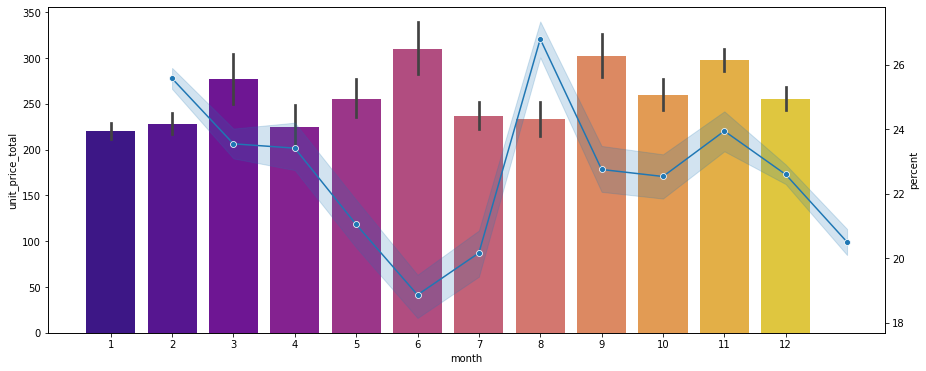

In [ ]:
# Draw a line plot with discount and bar plots with weekly revenue on the same plot
fig, ax1 = plt.subplots(figsize=(15,6)) # initializes figure and plots
sns.barplot(data=merged_discount, x='month', y='unit_price_total', ax = ax1, palette="plasma") # plots the first set of data, and sets it to ax1. 

ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 
sns.lineplot(data=merged_discount, x='month', y='percent', marker = 'o', ax = ax2) # plots the second set, and s

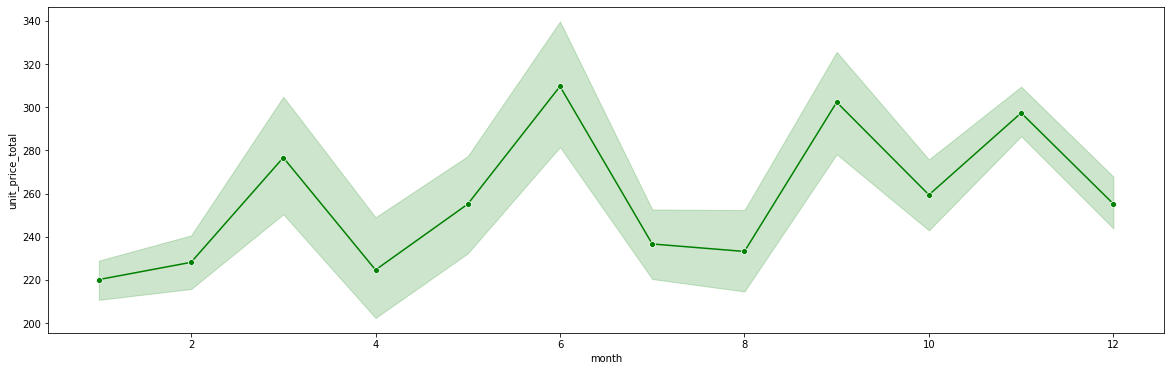

In [ ]:
fig = plt.subplots(figsize=(20,6))
sns.lineplot(data=merged_discount, x='month', y='unit_price_total', marker = 'o',color='green')#products sold during easter

In [ ]:
merged_discount['discount_percent']=merged_discount['discount']/merged_discount['price']
merged_discount


,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,...,price,in_stock,type,discount,percent,number_of_discounted_products,week,unit_price_total,month,discount_percent
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,...,60.99,1,12755395,13.50,77.865224,1,01,47.49,1,0.221348
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,...,22.95,0,5720,3.96,82.745098,1,01,18.99,1,0.172549
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,...,89.00,1,13005399,16.81,81.112360,1,01,72.19,1,0.188876
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",...,3209.00,0,1282,643.01,79.962294,1,01,2565.99,1,0.200377
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,...,76.99,0,1298,16.09,79.101182,1,01,60.90,1,0.208988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60906,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,2018-03-14 11:47:50,18.98,Completed,EarPods Apple Headphones with Remote and Mic (...,...,35.00,1,5384,21.01,39.971429,1,10,13.99,3,0.600286
60907,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,2018-03-14 11:50:48,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,...,25.00,1,1230,15.01,39.960000,2,10,19.98,3,0.600400
60908,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,2018-03-14 11:51:42,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,...,25.00,1,1230,15.01,39.960000,2,10,19.98,3,0.600400
60909,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,2018-03-14 11:58:40,34.96,Completed,Apple Lightning Cable Connector to USB 1m Whit...,...,25.00,1,1230,15.01,39.960000,3,10,29.97,3,0.600400


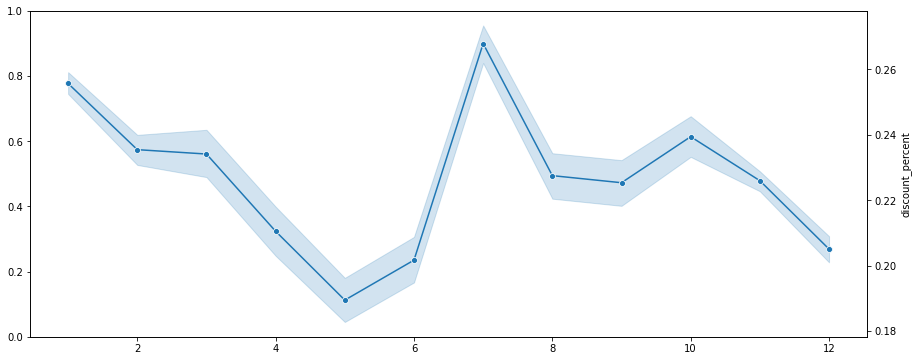

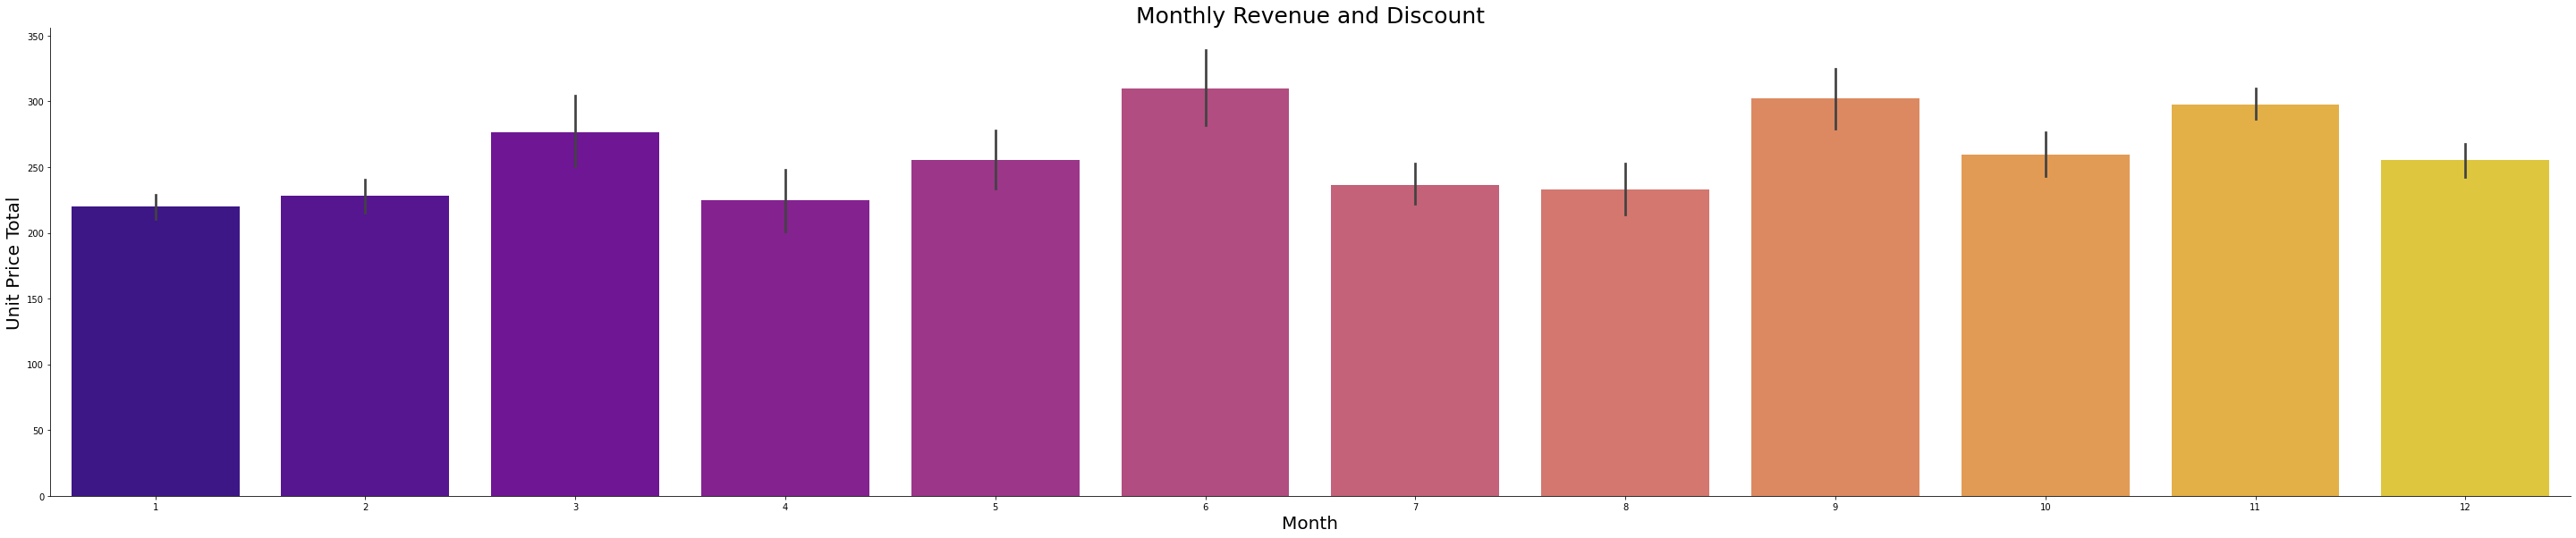

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))
sns.catplot(kind="bar",
            data=merged_discount,
            x="month",
            y="unit_price_total",
            height=8,
            aspect=5,
            palette="plasma");
plt.xlabel("Month",fontsize=20)
plt.ylabel("Unit Price Total",fontsize=20)
plt.title("Monthly Revenue and Discount", fontsize=25)
ax2 = ax1.twinx() # applies twinx to ax2, which is the second y axis. 
sns.lineplot(data=merged_discount, x='month', y='discount_percent', marker = 'o', ax = ax2)

In [ ]:
sns.lineplot(data=Nov, x='week', y='order_id', marker = 'o',color='green')

ValueError: ignored

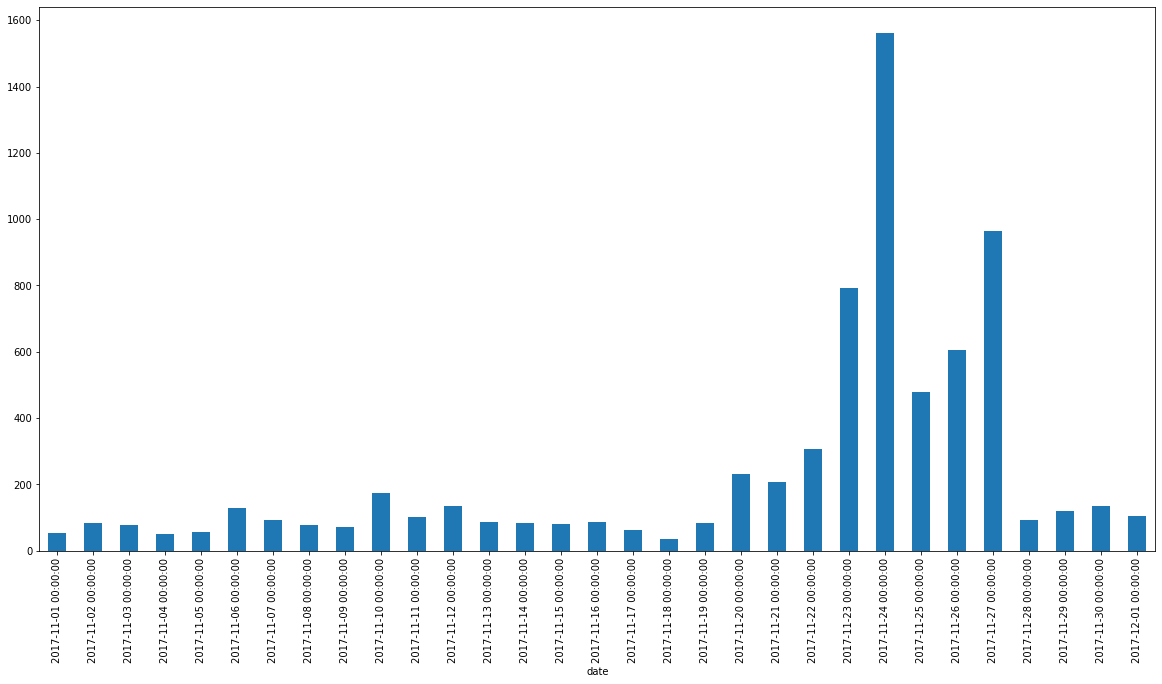

In [ ]:
november=merged_discount[merged_discount["date"].between("2017-11-01", "2017-12-01")]
november.groupby(merged_discount["date"].round('D'))["order_id"].nunique().plot.bar(figsize=(20,10))#henry's code


Text(0.5, 1.0, 'Black friday sales')

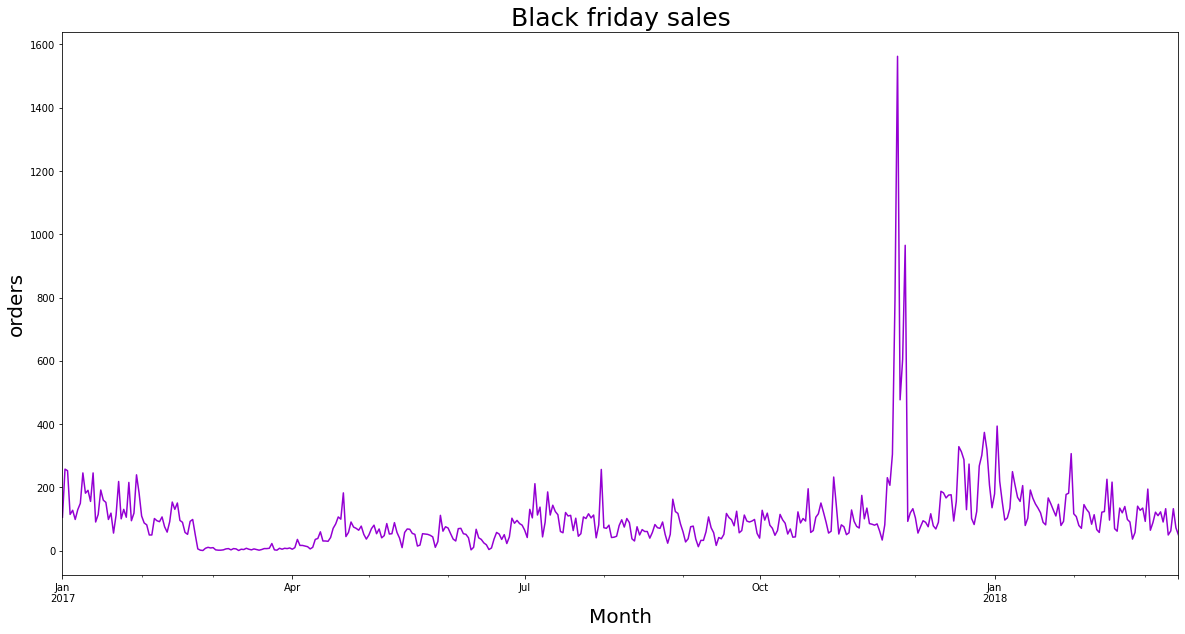

In [ ]:
merged_discount.groupby(merged_discount["date"].round('D'))["order_id"].nunique().plot(figsize=(20,10),color="darkviolet")
plt.xlabel("Month",fontsize=20)
plt.ylabel("orders",fontsize=20)
plt.title("Black friday sales", fontsize=25)

(array([17471, 17501]), <a list of 2 Text major ticklabel objects>)

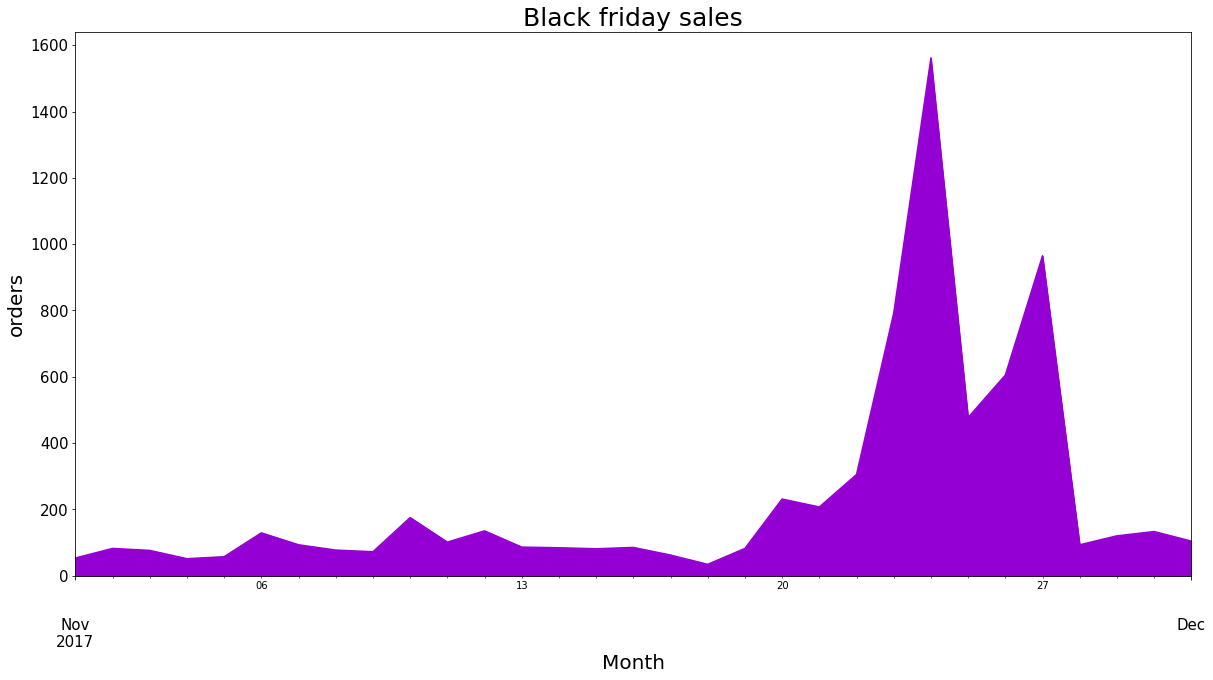

In [ ]:
jan=merged_discount[merged_discount["date"].between("2017-11-01", "2017-12-01")]
jan.groupby(merged_discount["date"].round('D'))["order_id"].nunique().plot.area(figsize=(20,10),color="darkviolet")
plt.xlabel("Month",fontsize=20)
plt.ylabel("orders",fontsize=20)
plt.title("Black friday sales", fontsize=25)
plt.yticks(size = 15)
plt.xticks(size=15)

In [ ]:
Nov=merged_discount[merged_discount["date"].between("2017-11-01", "2017-12-01")]
Nov.groupby(merged_discount["date"].round('D'))["order_id"].nunique()

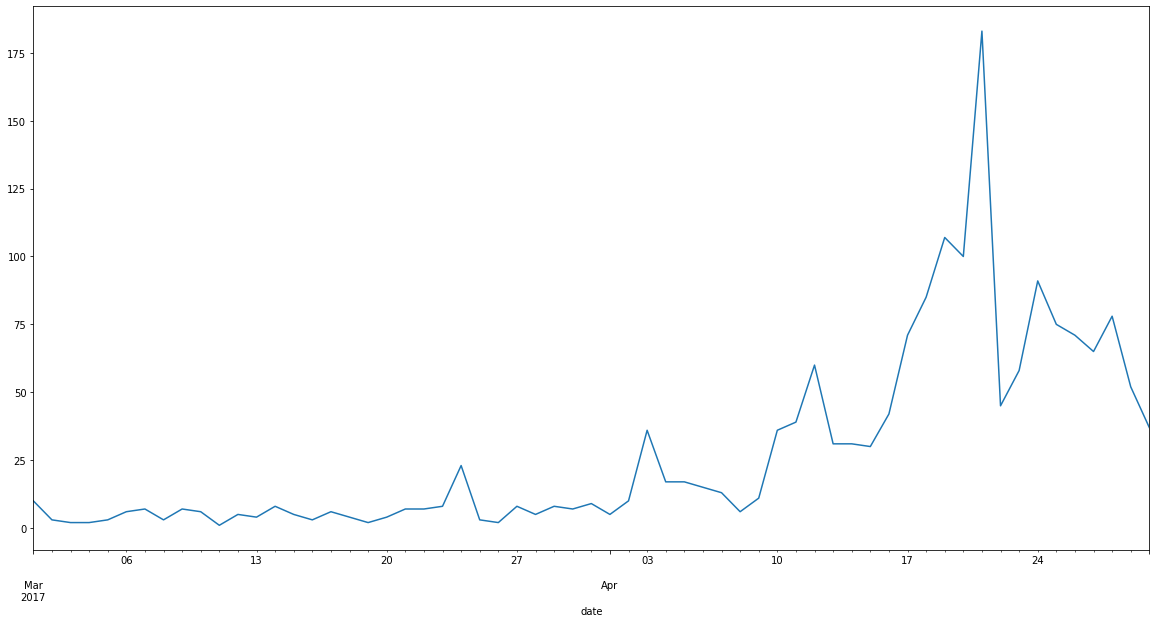

In [ ]:
Mar=merged_discount[merged_discount["date"].between("2017-03-01", "2017-04-30")]
Mar.groupby(merged_discount["date"].round('D'))["order_id"].nunique().plot(figsize=(20,10))

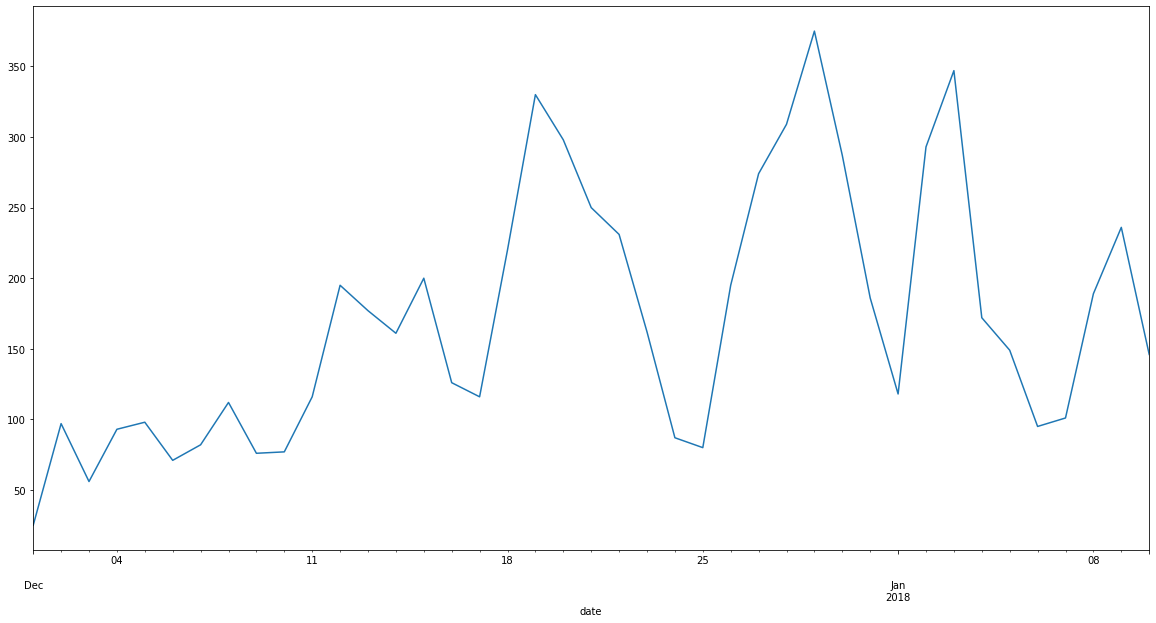

In [ ]:
dec=merged_discount[merged_discount["date"].between("2017-12-01", "2018-01-10")]
dec.groupby(merged_discount["date"].round('d'))["order_id"].nunique().plot(figsize=(20,10))

In [ ]:
(
    merged_discount
 .groupby([merged_discount["date"].dt.year, 
          merged_discount["date"].dt.month,
           merged_discount["date"].dt.week])["product_quantity"].sum()
)


date  date  date
2017  1     1       1475
            2       1703
            3       1334
            4       1464
            5        665
                    ... 
2018  2     8        917
            9        551
      3     9        605
            10       960
            11       355
Name: product_quantity, Length: 76, dtype: int64

In [ ]:
(
    merged_discount
 .groupby([
          merged_discount["date"].dt.week])["product_quantity"].sum()
)
merged_discount

,id,order_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,name,desc,price,in_stock,type,discount
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,2017-01-01 01:51:47,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,2017-01-01 01:57:34,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,22.95,0,5720,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,2017-01-01 02:02:38,72.19,Completed,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.00,1,13005399,16.81
3,1119126,299549,1,PAC0929,2565.99,2017-01-01 02:07:42,2017-01-02 10:00:20,2565.99,Completed,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",IMac desktop computer 27 inch Retina 5K RAM 32...,3209.00,0,1282,643.01
4,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,2017-01-01 02:30:08,65.89,Completed,(Open) Crucial 240GB SSD 7mm BX200,SSD hard drive and high-speed performance with...,76.99,0,1298,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60906,1649446,527042,1,APP0927,13.99,2018-03-14 11:42:38,2018-03-14 11:47:50,18.98,Completed,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,21.01
60907,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,2018-03-14 11:50:48,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01
60908,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,2018-03-14 11:51:42,24.97,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01
60909,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,2018-03-14 11:58:40,34.96,Completed,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,1,1230,15.01


In [ ]:
sns.lineplot(data=weekly_sold_products, x='week', y='discount_rate', marker = 'o', ax = ax2)

NameError: ignored